In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('tracks_cleaned.csv')

df['Dance Category'] = df['track_genre'].apply(lambda x: 'Dance Genre' if x == 'dance' else 'Other Genres')

dance_tracks = df[df['Dance Category'] == 'Dance Genre']['danceability']
other_tracks = df[df['Dance Category'] == 'Other Genres']['danceability']

/var/folders/d5/n33yqnjn4gq6605cq8kck9fr0000gn/T/ipykernel_6216/2121536647.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


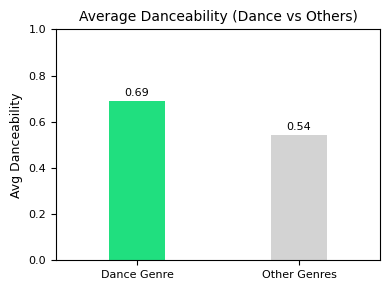

In [ ]:
# --- Danceability Comparison ---
plt.figure(figsize=(4, 3))

sns.barplot(
    data=p3_stats,
    x='Dance Category',
    y='danceability',
    palette={'Dance Genre': 'springgreen', 'Other Genres': 'lightgrey'},
    width=0.35
)

plt.title("Average Danceability (Dance vs Others)", fontsize=10)
plt.ylabel("Avg Danceability", fontsize=9)
plt.xlabel("")

plt.ylim(0, 1.0)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Compact value labels
for i, val in enumerate(p3_stats['danceability']):
    plt.text(i, val + 0.02, f'{val:.2f}', ha='center', fontsize=8)

plt.tight_layout()
plt.show()


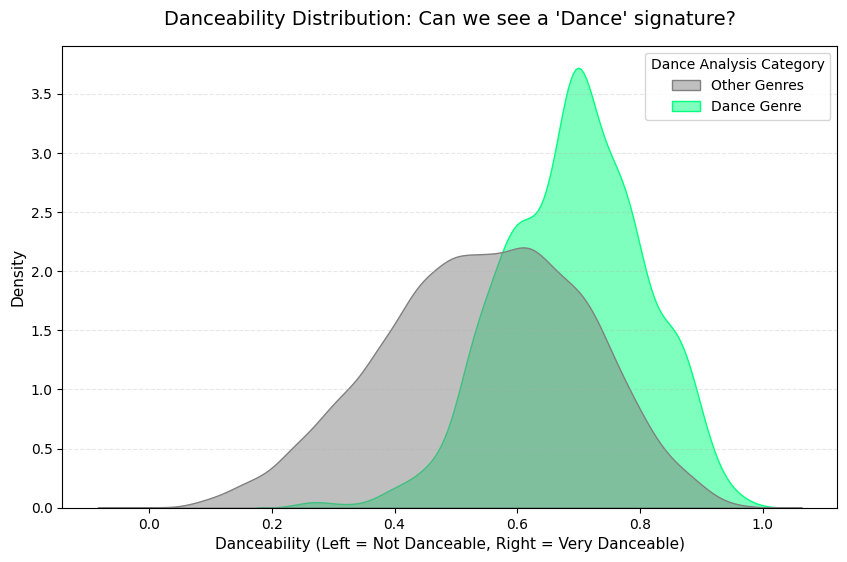

In [ ]:
# --- The "Rhythmic Signature" (KDE)---
plt.figure(figsize=(10, 6))

df['Dance Analysis Category'] = df['track_genre'].apply(lambda x: 'Dance Genre' if x == 'dance' else 'Other Genres')

sns.kdeplot(data=df, x='danceability', hue='Dance Analysis Category', fill=True, 
            palette={'Dance Genre': 'springgreen', 'Other Genres': 'gray'}, 
            alpha=0.5, common_norm=False)

plt.title("Danceability Distribution: Can we see a 'Dance' signature?", fontsize=14, pad=15)
plt.xlabel("Danceability (Left = Not Danceable, Right = Very Danceable)", fontsize=11)
plt.ylabel("Density", fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

/var/folders/d5/n33yqnjn4gq6605cq8kck9fr0000gn/T/ipykernel_6216/3632491230.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


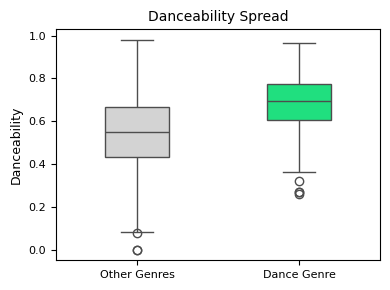

In [ ]:
# --- Boxplot ---
plt.figure(figsize=(4, 3))

sns.boxplot(
    data=df,
    x='Dance Category',
    y='danceability',
    palette={'Dance Genre': 'springgreen', 'Other Genres': 'lightgrey'},
    width=0.4
)

plt.title("Danceability Spread", fontsize=10)
plt.xlabel("")
plt.ylabel("Danceability", fontsize=9)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()


In [32]:
# 1. Welch's T-test
t_stat, p_val = stats.ttest_ind(dance_tracks, other_tracks, equal_var=False)

# 2. Cohen's d (Effect Size)
def calculate_cohen_d(g1, g2):
    n1, n2 = len(g1), len(g2)
    var1, var2 = np.var(g1, ddof=1), np.var(g2, ddof=1)
    s_pool = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    return (np.mean(g1) - np.mean(g2)) / s_pool

d_val = calculate_cohen_d(dance_tracks, other_tracks)

print(f"P-Value: {p_val:.4e}")
print(f"Effect Size (Cohen's d): {d_val:.4f}")

P-Value: 4.8708e-199
Effect Size (Cohen's d): 0.9237


In [33]:
#---Dancibility vs Energy---

In [ ]:

df['Dance_Status'] = df['track_genre'].apply(lambda x: 'Dance Genre' if x == 'dance' else 'Other Genres')


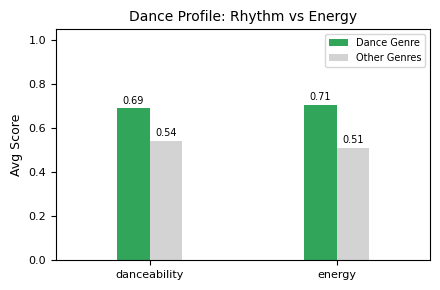

In [ ]:
# --- DANCEABILITY VS ENERGY ---
plt.figure(figsize=(4.5, 3))

sns.barplot(
    data=melted_stats,
    x='Metric',
    y='Average Score',
    hue='Dance_Status',
    palette={'Dance Genre': '#1DB954', 'Other Genres': 'lightgrey'},
    width=0.35
)

plt.title("Dance Profile: Rhythm vs Energy", fontsize=10)
plt.ylabel("Avg Score", fontsize=9)
plt.xlabel("")

plt.ylim(0, 1.05)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

for p in plt.gca().patches:
    h = p.get_height()
    if h > 0:
        plt.text(
            p.get_x() + p.get_width() / 2,
            h + 0.02,
            f'{h:.2f}',
            ha='center',
            fontsize=7
        )

plt.legend(title="", fontsize=7)
plt.tight_layout()
plt.show()


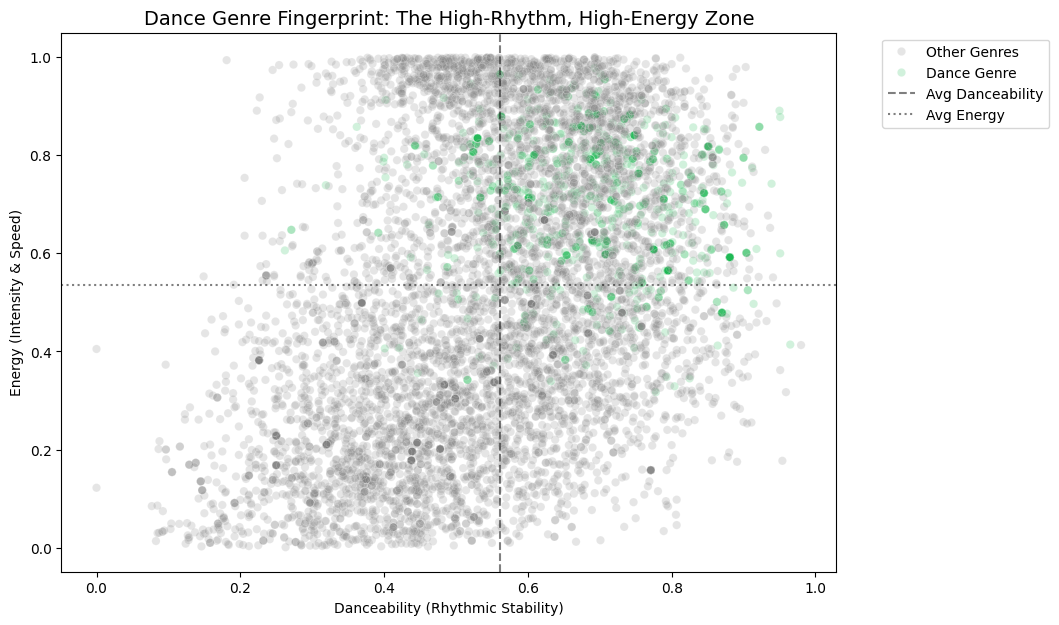

In [ ]:
# --- SCATTER PLOT ---

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='danceability', y='energy', hue='Dance_Status', 
                alpha=0.2, palette={'Dance Genre': '#1DB954', 'Other Genres': 'grey'})

plt.axvline(df['danceability'].mean(), color='black', linestyle='--', alpha=0.5, label='Avg Danceability')
plt.axhline(df['energy'].mean(), color='black', linestyle=':', alpha=0.5, label='Avg Energy')

plt.title("Dance Genre Fingerprint: The High-Rhythm, High-Energy Zone", fontsize=14)
plt.xlabel("Danceability (Rhythmic Stability)")
plt.ylabel("Energy (Intensity & Speed)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()